#**Student Performance Prediction**#

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , LabelEncoder

In [2]:
df = pd.read_csv('student-mat2.csv')

<ipython-input-3-3c5f4ec3e781>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


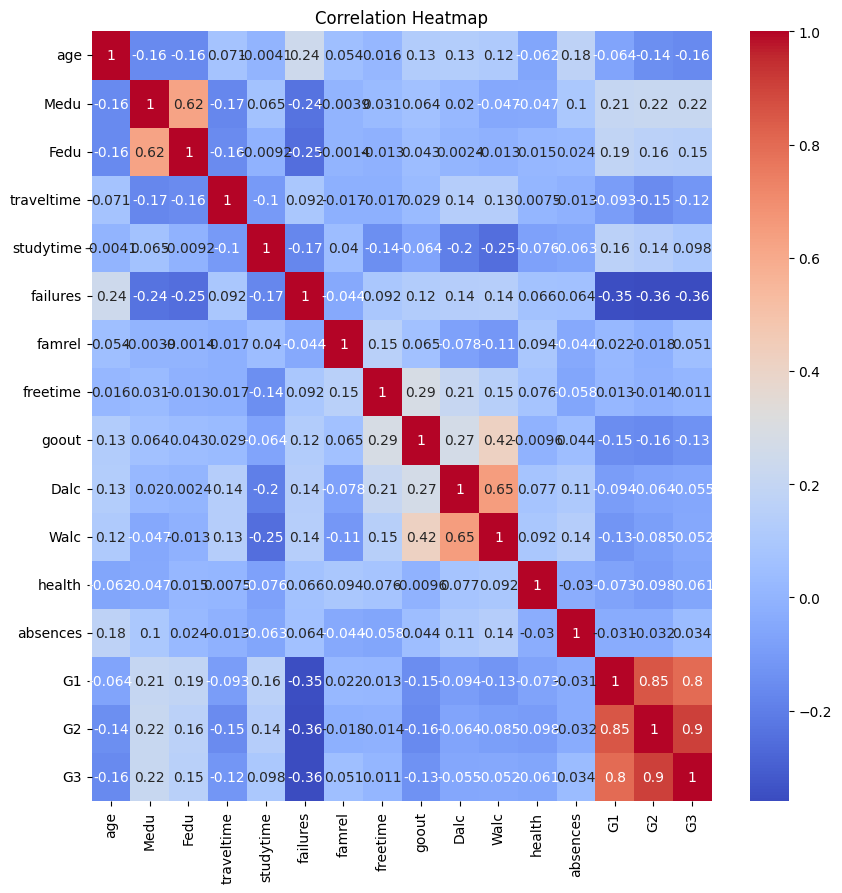

In [3]:
correlation = df.corr()

# Create a new figure for the plot
plt.figure(figsize=(10, 10))

# Create heatmap
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [4]:
df_encoded = df.copy()

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column
for col in df_encoded.columns:
    # Check if the column dtype is object (string)
    if df_encoded[col].dtype == 'object':
        # Use LabelEncoder to convert strings to numerical labels
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Now, you can use StandardScaler to scale the numerical values
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

In [5]:
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:


# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 66.29746835443038
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           4       0.25      1.00      0.40         1
           5       0.59      0.91      0.71        11
           6       0.92      0.85      0.88        26
           7       0.73      0.80      0.76        10
           8       0.77      0.54      0.64        50
           9       0.67      0.52      0.59        46
          10       0.70      0.73      0.71        92
          11       0.60      0.64      0.62        67
          12       0.59      0.47      0.53        55
          13       0.51      0.69      0.58        51
          14       0.61      0.58      0.60        43
          15       0.63      0.60      0.61        57
          16       0.54      0.56      0.55        27
          17       0.78      0.58      0.67        12
          18       0.50      0.67      0.57        15
          19       0.62      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


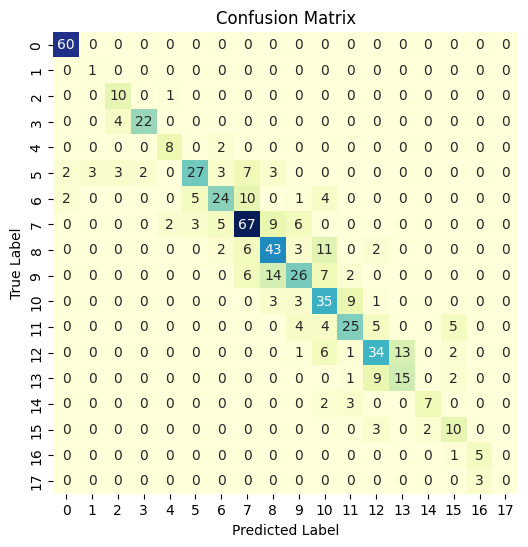

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm= confusion_matrix(y_test, y_pred)
# Create a heatmap with customizations
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


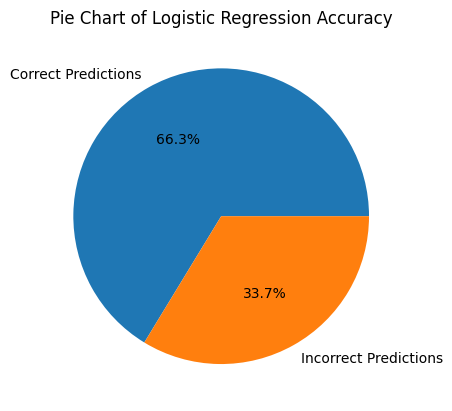

In [8]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']
pie_chart_slice_values = [accuracy, 1 - accuracy]
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Logistic Regression Accuracy")
plt.show()

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 78.32278481012658
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        11
           6       1.00      0.85      0.92        26
           7       1.00      1.00      1.00        10
           8       0.82      0.80      0.81        50
           9       0.76      0.57      0.65        46
          10       0.67      0.90      0.77        92
          11       0.68      0.72      0.70        67
          12       0.81      0.45      0.58        55
          13       0.65      0.71      0.68        51
          14       0.74      0.65      0.69        43
          15       0.85      0.81      0.83        57
          16       0.80      0.89      0.84        27
          17       1.00      1.00      1.00        12
          18       0.74      0.93      0.82        15
          19       1.00      1

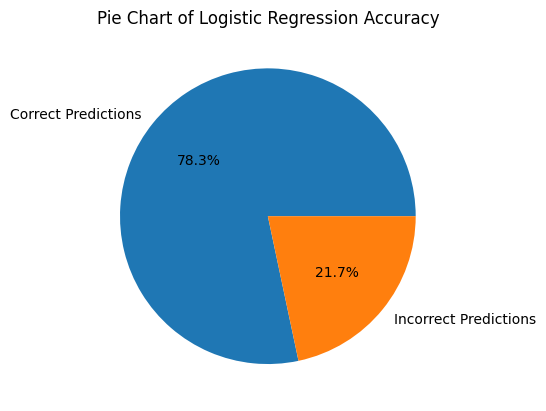

In [12]:
pie_chart_slice_labels = ['Correct Predictions', 'Incorrect Predictions']
pie_chart_slice_values = [accuracy, 1 - accuracy]
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Pie Chart of Logistic Regression Accuracy")
plt.show()

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA (optional, adjust n_components as needed)
pca = PCA(n_components=32)  # Choose desired number of components or leave unspecified
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define and train logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [14]:
y_pred = clf.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with PCA: {accuracy*100:.4f}")

Test Accuracy with PCA: 78.3228


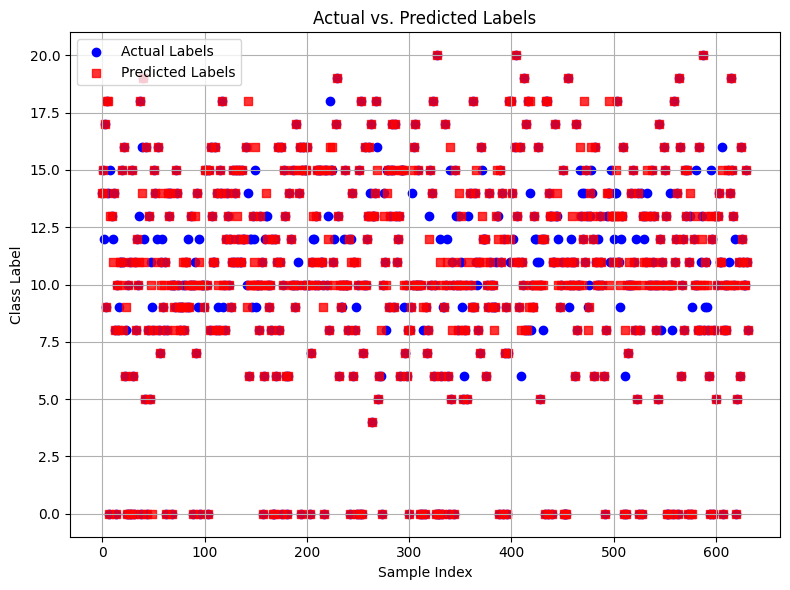

In [15]:
plt.figure(figsize=(8, 6))

# Plot actual labels (blue circles)
plt.scatter(range(len(y_test)), y_test, marker='o', color='blue', label='Actual Labels')

# Plot predicted labels (red squares) slightly shifted for better visibility
plt.scatter(range(len(y_pred)), y_pred, marker='s', color='red', label='Predicted Labels', alpha=0.8)

# Add labels and title
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs. Predicted Labels")

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()